In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

/home/mary-linux/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
# Ler o dataset original
data = pd.read_csv('original.csv')

### Distribuição do Dataset

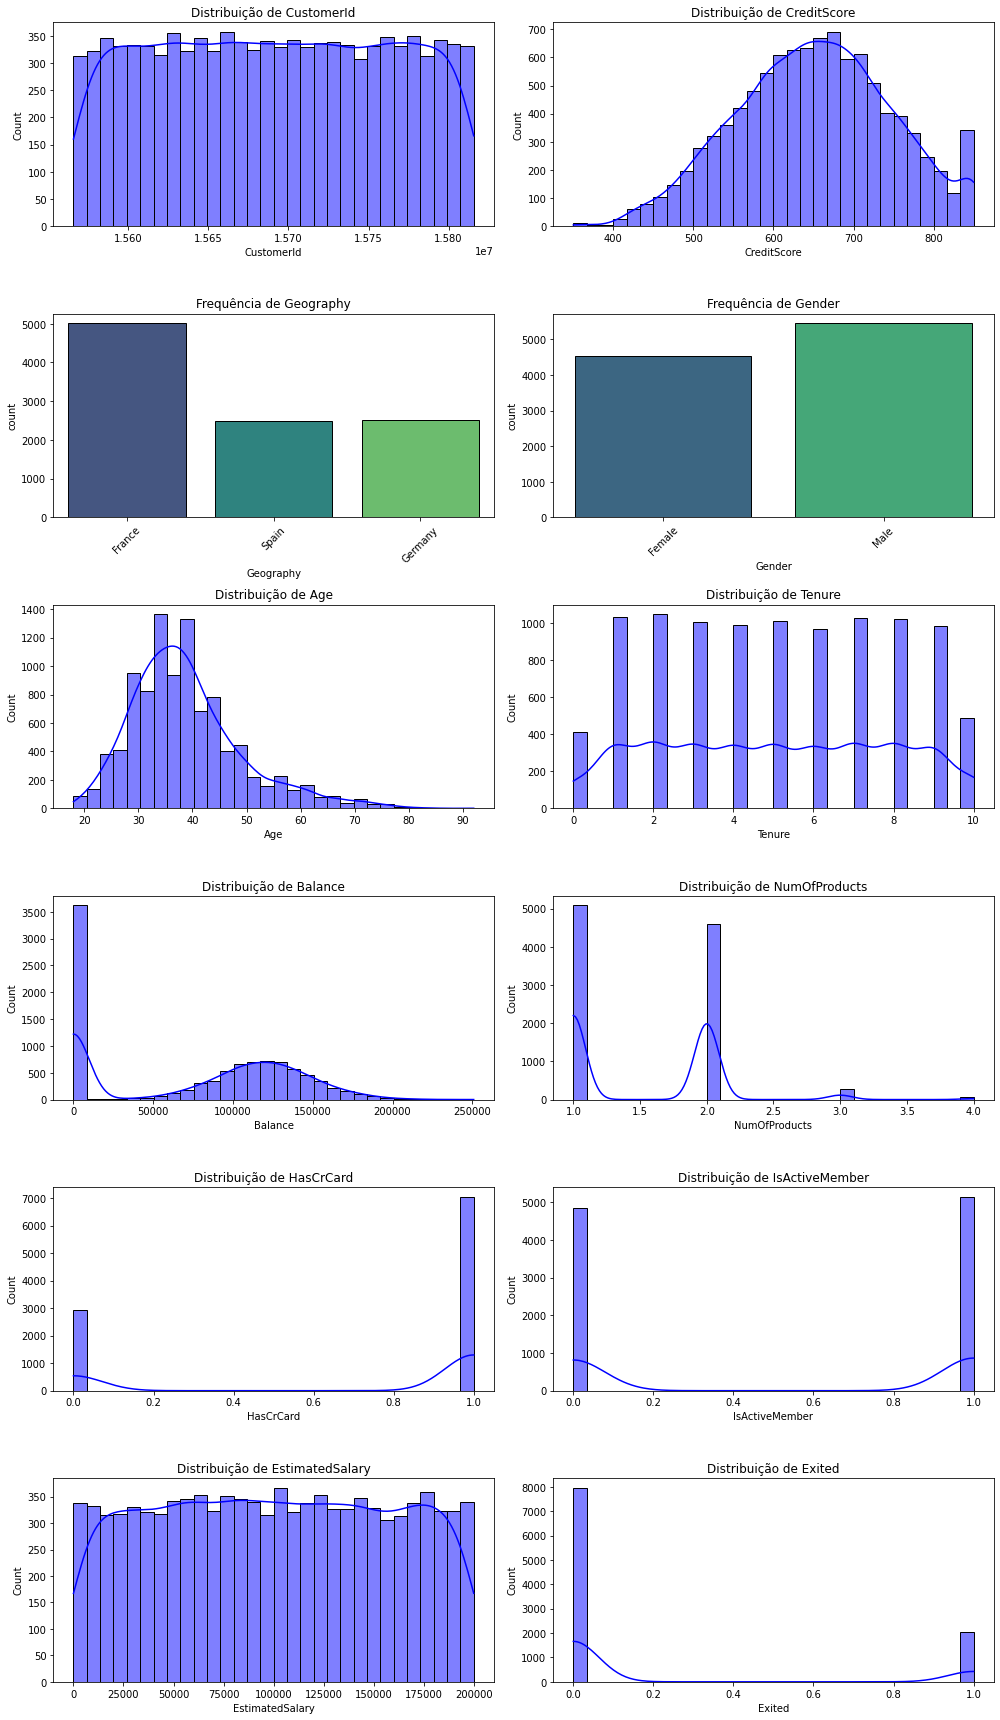

In [5]:
# Remover colunas que não queremos analisar
df = data.drop(columns=['RowNumber', 'Surname'])
columns = df.columns
num_plots = len(columns)

# Criar subplots com 2 colunas por linha
ncols = 2
nrows = (num_plots + 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))
axes = axes.flatten()

# Gerar gráficos para cada coluna
for i, col in enumerate(columns):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='blue', edgecolor='black')
        axes[i].set_title(f'Distribuição de {col}')
    else:
        sns.countplot(x=df[col], ax=axes[i], palette='viridis', edgecolor='black')
        axes[i].set_title(f'Frequência de {col}')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### Qualidade e Conformidade dos Dados

Nas células de código desta secção, pretende-se procurar e identificar erros nos dados, sejam valores em falta, sejam erros de codificação ou medição, sejam inconsistências, entre outros.

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Conforme é possível verificar através do código executado, o *dataset* não contem valores nulos nem N/A, pelo que não existem valores em falta.

In [8]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data['HasCrCard'].unique()

array([1, 0])

In [12]:
data['IsActiveMember'].unique()

array([1, 0])

In [13]:
data['Exited'].unique()

array([1, 0])

In [14]:
print(sorted(data['NumOfProducts'].unique()))

[1, 2, 3, 4]


In [15]:
print(sorted(data['Tenure'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [16]:
# Verificar o número de linhas duplicadas
num_duplicados = data.duplicated().sum()

print(f"Número de registos duplicadas no dataset: {num_duplicados}")

Número de registos duplicadas no dataset: 0


Através da descrição dos dados anteriormente efetuada e da análise de valores únicos em cada coluna, também é possível constatar que:
* O intervalo de valores para as pontuações de crédito, [350, 850];
* Os valores dos atributos *Tenure* e *NumOfProducts*, ao variarem, respetivamente, de 0 a 10 e de 1 a 4, são todos plausíveis;
* As colunas categóricas não contêm erros de codificação, dado que *Geography* só toma os valores "France", "Spain" e "Germany", enquanto *Gender* só é "Male" ou "Female";
* Os atributos binários assumem unicamente os valores 0 e 1, tal como esperado;
* Não existem registos duplicados, ou seja, cada cliente só aparece uma vez no *dataset*.

Tudo isto indica que não existem erros de medição nem inconsistências de valores/codificação nos dados constantes do *dataset* original.

### Objetivo da Divulgação do Dataset

In [17]:
print("Idade mínima:", min(data['Age']))
print("Idade máxima:", max(data['Age']))

Idade mínima: 18
Idade máxima: 92


In [18]:
# Definir intervalos de idade
bins_age = [18, 25, 30] + list(range(35, 60, 5)) + [93]
labels_age = [f"{bins_age[i]} - {bins_age[i+1]}" for i in range(len(bins_age)-1)]
data["Age_Range"] = pd.cut(data["Age"], bins=bins_age, labels=labels_age, include_lowest=True)

# Calcular a média do salário por intervalo de idade
stats_age = data.groupby("Age_Range").agg({
    "EstimatedSalary": "mean"
}).reset_index()

stats_age.rename(columns={
    "EstimatedSalary": "Média dos Salários"
}, inplace=True)

print(stats_age)
data.drop(columns=["Age_Range"], inplace=True)

  Age_Range  Média dos Salários
0   18 - 25       102093.897381
1   25 - 30       100637.987192
2   30 - 35        99171.203140
3   35 - 40        99540.696372
4   40 - 45       101615.199034
5   45 - 50       102793.880000
6   50 - 55        99767.000954
7   55 - 93        96209.067537
